# User Engagement Analysis

## Data Import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("showwcase_sessions.csv")

In [3]:
data

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205.0,80746.0,10/30/19,False,True,True,True,False,0.0,24.0,3.0,1146.0,0.0,1564.0
1,624241.0,24520.0,10/30/19,True,True,True,True,False,2.0,3.0,5.0,133.0,0.0,1766.0
2,111002.0,32047.0,10/30/19,True,True,True,True,False,1.0,5.0,5.0,1571.0,0.0,2230.0
3,545113.0,23404.0,10/30/19,True,True,True,False,False,1.0,10.0,21.0,0.0,0.0,633.0
4,750269.0,40235.0,10/30/19,True,True,False,True,False,3.0,16.0,0.0,1405.0,0.0,1679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,643880.0,51243.0,10/1/19,True,False,False,True,False,2.0,0.0,0.0,906.0,0.0,1990.0
298,844518.0,23083.0,10/1/19,True,False,False,True,False,1.0,0.0,0.0,139.0,0.0,1113.0
299,933954.0,38459.0,10/1/19,True,False,False,False,False,1.0,0.0,0.0,0.0,0.0,306.0
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Understanding the Data

The dataset consists of records of each session a user completes during the month of October.It is of 302 rows and 14 feature columns. The columns are:

● session_id → unique identification number for each session <br/>
● customer_id → unique identification number for each customer<br/>
● login_date → the date the user logged into Showwcase for that session<br/>
● projects_added → boolean if at least one project was added<br/>
● likes_given → boolean if at least one like was given<br/>
● comment_given → boolean if at least one comment was given<br/>
● inactive_status → boolean if the user was inactive or idle<br/>
● bugs_occurerd → boolean if a user ran into at least one bug<br/>
● session_projects_added → number of projects added<br/>
● session_likes_given → number of likes given<br/>
● session_comments_given → number of comments given<br/>
● inactive_duration → number of seconds a user was inactive or idle<br/>
● bugs_in_session → number of bugs a user ran into<br/>
● session_duration → number of seconds a user was logged for that session<br/>

## Data Preprocessing 

In [4]:
data.isna().sum() #Checking for missing values

session_id                2
customer_id               2
login_date                2
projects_added            2
likes_given               2
comment_given             2
inactive_status           2
bug_occured               2
session_projects_added    2
session_likes_given       3
session_comments_given    2
inactive_duration         2
bugs_in_session           2
session_duration          2
dtype: int64

In [5]:
data = data.dropna() #Removing missing values 

In [6]:
data 

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205.0,80746.0,10/30/19,False,True,True,True,False,0.0,24.0,3.0,1146.0,0.0,1564.0
1,624241.0,24520.0,10/30/19,True,True,True,True,False,2.0,3.0,5.0,133.0,0.0,1766.0
2,111002.0,32047.0,10/30/19,True,True,True,True,False,1.0,5.0,5.0,1571.0,0.0,2230.0
3,545113.0,23404.0,10/30/19,True,True,True,False,False,1.0,10.0,21.0,0.0,0.0,633.0
4,750269.0,40235.0,10/30/19,True,True,False,True,False,3.0,16.0,0.0,1405.0,0.0,1679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,944212.0,40572.0,10/1/19,True,True,False,True,False,3.0,13.0,0.0,1174.0,0.0,2255.0
296,558332.0,87323.0,10/1/19,True,False,False,True,False,2.0,0.0,0.0,97.0,0.0,1692.0
297,643880.0,51243.0,10/1/19,True,False,False,True,False,2.0,0.0,0.0,906.0,0.0,1990.0
298,844518.0,23083.0,10/1/19,True,False,False,True,False,1.0,0.0,0.0,139.0,0.0,1113.0


In [7]:
data.dtypes

session_id                float64
customer_id               float64
login_date                 object
projects_added             object
likes_given                object
comment_given              object
inactive_status            object
bug_occured                object
session_projects_added    float64
session_likes_given       float64
session_comments_given    float64
inactive_duration         float64
bugs_in_session           float64
session_duration          float64
dtype: object

In [8]:
data['login_date'] = pd.to_datetime(data['login_date']) #Converting login_date to datetime object 

In [9]:
data["day_of_week"] = data['login_date'].dt.day_name() #picking out day of the week 

In [10]:
data

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration,day_of_week
0,624205.0,80746.0,2019-10-30,False,True,True,True,False,0.0,24.0,3.0,1146.0,0.0,1564.0,Wednesday
1,624241.0,24520.0,2019-10-30,True,True,True,True,False,2.0,3.0,5.0,133.0,0.0,1766.0,Wednesday
2,111002.0,32047.0,2019-10-30,True,True,True,True,False,1.0,5.0,5.0,1571.0,0.0,2230.0,Wednesday
3,545113.0,23404.0,2019-10-30,True,True,True,False,False,1.0,10.0,21.0,0.0,0.0,633.0,Wednesday
4,750269.0,40235.0,2019-10-30,True,True,False,True,False,3.0,16.0,0.0,1405.0,0.0,1679.0,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,944212.0,40572.0,2019-10-01,True,True,False,True,False,3.0,13.0,0.0,1174.0,0.0,2255.0,Tuesday
296,558332.0,87323.0,2019-10-01,True,False,False,True,False,2.0,0.0,0.0,97.0,0.0,1692.0,Tuesday
297,643880.0,51243.0,2019-10-01,True,False,False,True,False,2.0,0.0,0.0,906.0,0.0,1990.0,Tuesday
298,844518.0,23083.0,2019-10-01,True,False,False,True,False,1.0,0.0,0.0,139.0,0.0,1113.0,Tuesday


In [11]:
data.to_csv(r'new.csv', index = False) #saving the preprocessed file as csv to use it for Tableau Visualizations

## **Exploratory Data Analysis**

### `session_id` column

In [12]:
len(data["session_id"].unique()) # 299 unique sessions

299

### `customer_id` column

In [13]:
len(data["customer_id"].unique()) #48 unique customers in the month of october 2019

48

In [14]:
data['customer_id'].value_counts().head(10) #Top customers based of their session count. Meaning customer 29375 logged in 22
# different times during the monthh of October. 

29375.0    22
23404.0    20
38459.0    18
40235.0    17
87323.0    17
40572.0    16
73245.0    15
14354.0    15
87265.0    12
51243.0    12
Name: customer_id, dtype: int64

### `login_date` column

In [15]:
len(data["login_date"].unique()) #number of days in the month in which the sessions where recorded

30

### `projects_added` column

In [16]:
data["projects_added"].value_counts() #Number of times a customer added one ore more project in a session

True     226
False     73
Name: projects_added, dtype: int64

Text(0, 0.5, 'Count')

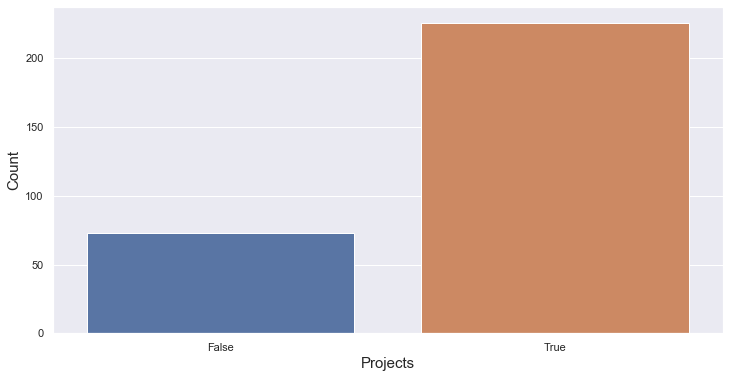

In [18]:
sns.countplot(x='projects_added', data = data)
sns.set(rc={'figure.figsize':(12,6)})
plt.xlabel("Projects", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

### `likes_given` column

In [19]:
data["likes_given"].value_counts() #Number times a user gave one or more like in a session

True     213
False     86
Name: likes_given, dtype: int64

Text(0, 0.5, 'Count')

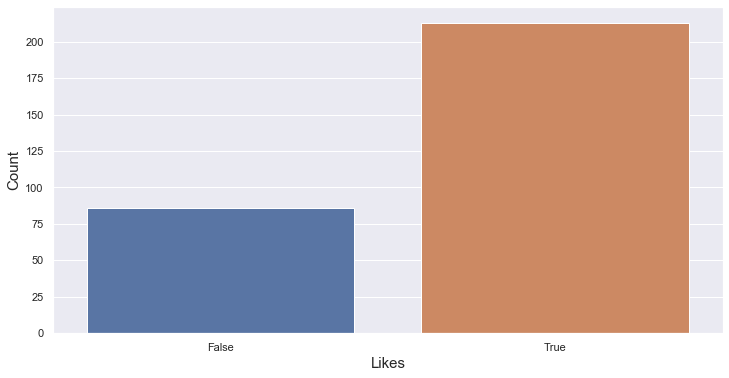

In [20]:
sns.countplot(x='likes_given', data = data)
sns.set(rc={'figure.figsize':(12,6)})
plt.xlabel("Likes", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

### `comment_given` column

In [21]:
data["comment_given"].value_counts() #Number of times a customer one or more comment during a session

True     224
False     75
Name: comment_given, dtype: int64

Text(0, 0.5, 'Count')

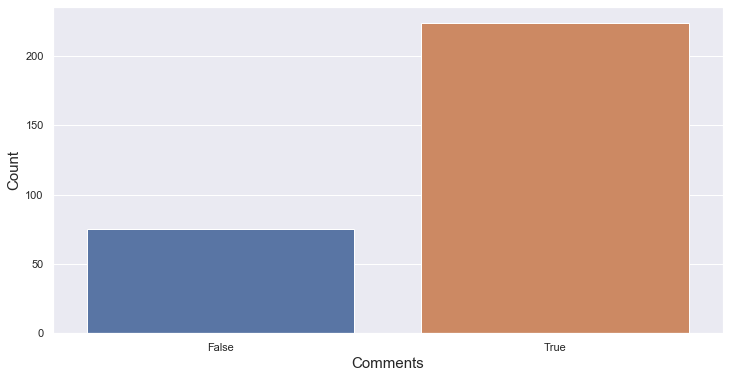

In [22]:
sns.countplot(x='comment_given', data = data)
sns.set(rc={'figure.figsize':(12,6)})
plt.xlabel("Comments", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

### `inactive_status` column

In [23]:
data["inactive_status"].value_counts() #Number of times customers were inactive during a session

True     171
False    128
Name: inactive_status, dtype: int64

Text(0, 0.5, 'Count')

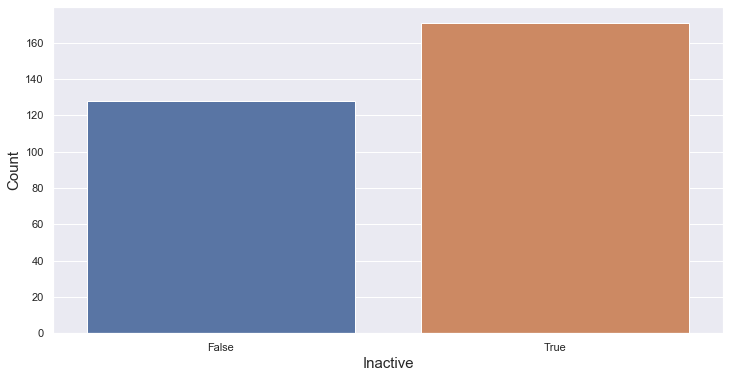

In [24]:
sns.countplot(x='inactive_status', data = data)
sns.set(rc={'figure.figsize':(12,6)})
plt.xlabel("Inactive", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

### `bug_occured` column

In [25]:
data["bug_occured"].value_counts() #Number of bugs occured during a session

False    183
True     116
Name: bug_occured, dtype: int64

Text(0, 0.5, 'Count')

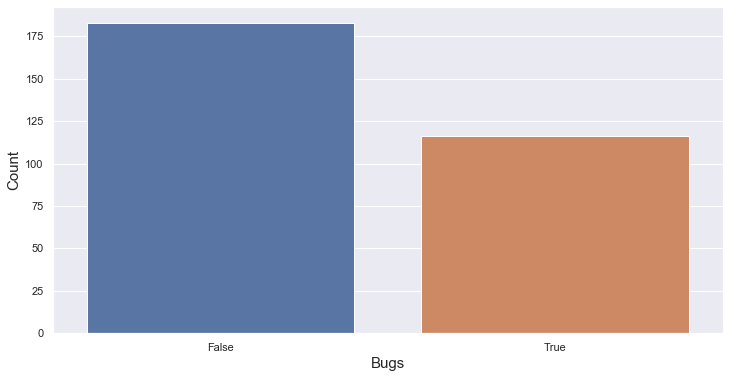

In [26]:
sns.countplot(x='bug_occured', data = data)
sns.set(rc={'figure.figsize':(12,6)})
plt.xlabel("Bugs", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

###  `session_projects_added` Column

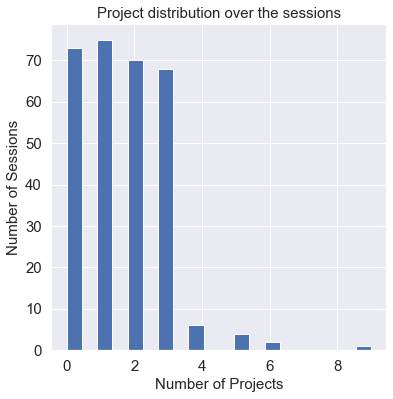

In [27]:
## set the figure dimensions
hist_fig = plt.figure(figsize = (6, 6))
    
## make a histogram and set the number of bins to 15
_  = plt.hist(data["session_projects_added"], bins = 20)

## Set the tick and label fontsize
plt.tick_params(labelsize = 15)

## Set the title
_ = plt.title("Project distribution over the sessions", fontsize = 15)

## Set the y-label
_ = plt.ylabel("Number of Sessions", fontsize = 15)

## Set the y-label
_ = plt.xlabel("Number of Projects", fontsize = 15)

The above histigram shows the distibution of projects across all the sessions. We can see that the customers mostly added 0,1,2 and 3 projects during the month of october.  

### `session_likes_given` column

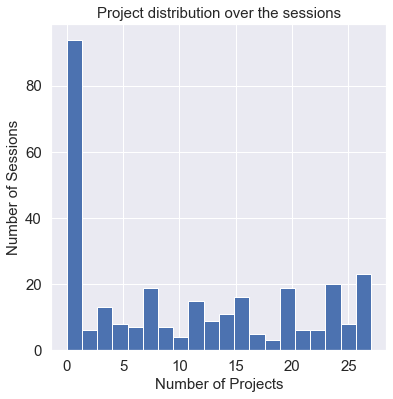

In [28]:
## set the figure dimensions
hist_fig = plt.figure(figsize = (6, 6))
    
## make a histogram and set the number of bins to 15
_  = plt.hist(data["session_likes_given"], bins = 20)

## Set the tick and label fontsize
plt.tick_params(labelsize = 15)

## Set the title
_ = plt.title("Project distribution over the sessions", fontsize = 15)

## Set the y-label
_ = plt.ylabel("Number of Sessions", fontsize = 15)

## Set the y-label
_ = plt.xlabel("Number of Projects", fontsize = 15)

### `session_comments_given` column

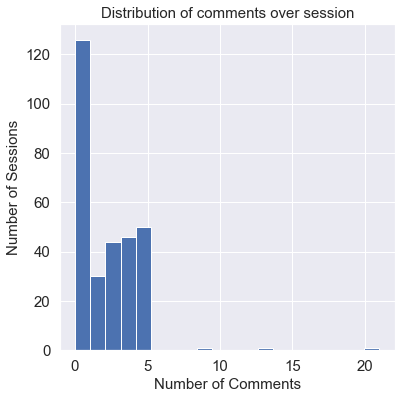

In [29]:
## set the figure dimensions
hist_fig = plt.figure(figsize = (6, 6))
    
## make a histogram and set the number of bins to 15
_  = plt.hist(data["session_comments_given"], bins = 20)

## Set the tick and label fontsize
plt.tick_params(labelsize = 15)

## Set the title
_ = plt.title("Distribution of comments over session", fontsize = 15)

## Set the y-label
_ = plt.ylabel("Number of Sessions", fontsize = 15)

## Set the y-label
_ = plt.xlabel("Number of Comments", fontsize = 15)

### `inactive_duration` column

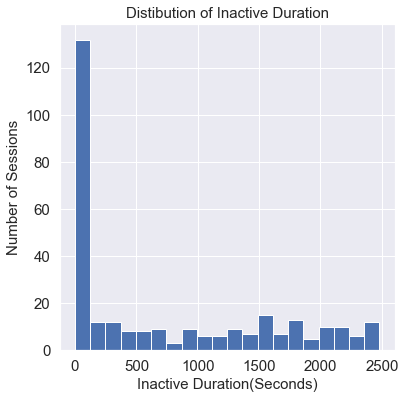

In [30]:
## set the figure dimensions
hist_fig = plt.figure(figsize = (6, 6))
    
## make a histogram and set the number of bins to 15
_  = plt.hist(data["inactive_duration"], bins = 20)

## Set the tick and label fontsize
plt.tick_params(labelsize = 15)

## Set the title
_ = plt.title("Distibution of Inactive Duration", fontsize = 15)

## Set the y-label
_ = plt.ylabel("Number of Sessions", fontsize = 15)

## Set the y-label
_ = plt.xlabel("Inactive Duration(Seconds)", fontsize = 15)

### `bugs_in_session` column

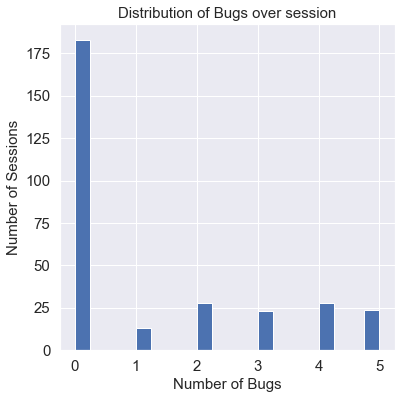

In [31]:
## set the figure dimensions
hist_fig = plt.figure(figsize = (6, 6))
    
## make a histogram and set the number of bins to 15
_  = plt.hist(data["bugs_in_session"], bins = 20)

## Set the tick and label fontsize
plt.tick_params(labelsize = 15)

## Set the title
_ = plt.title("Distribution of Bugs over session", fontsize = 15)

## Set the y-label
_ = plt.ylabel("Number of Sessions", fontsize = 15)

## Set the y-label
_ = plt.xlabel("Number of Bugs", fontsize = 15)

### `session_duration` column

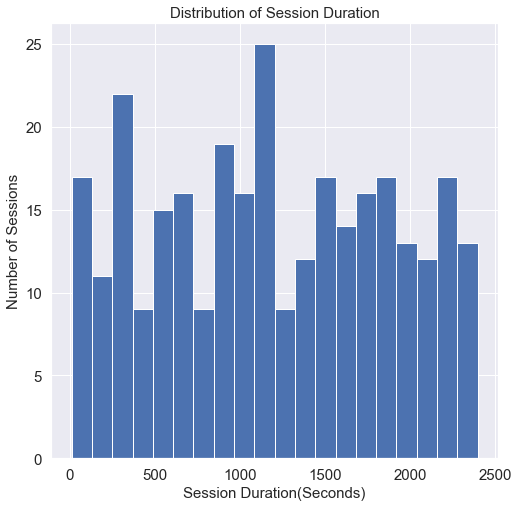

In [32]:
## set the figure dimensions
hist_fig = plt.figure(figsize = (8, 8))
    
## make a histogram and set the number of bins to 15
_  = plt.hist(data["session_duration"], bins = 20)

## Set the tick and label fontsize
plt.tick_params(labelsize = 15)

## Set the title
_ = plt.title("Distribution of Session Duration", fontsize = 15)

## Set the y-label
_ = plt.ylabel("Number of Sessions", fontsize = 15)

## Set the y-label
_ = plt.xlabel("Session Duration(Seconds)", fontsize = 15)

In [33]:
new = data.groupby("session_id").mean()

In [34]:
new

,customer_id,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
session_id,,,,,,,
22885.0,29356.0,0.0,19.0,5.0,1504.0,3.0,717.0
23570.0,38459.0,0.0,22.0,4.0,0.0,0.0,221.0
30840.0,40235.0,1.0,0.0,1.0,0.0,5.0,1778.0
33604.0,43057.0,0.0,0.0,5.0,0.0,2.0,2147.0
42216.0,43086.0,2.0,0.0,0.0,2437.0,5.0,2228.0
...,...,...,...,...,...,...,...
958269.0,23083.0,1.0,19.0,1.0,0.0,3.0,873.0
967732.0,40572.0,2.0,0.0,4.0,290.0,4.0,861.0
993956.0,82963.0,3.0,0.0,0.0,1345.0,0.0,1869.0


## <font color = red> **User Engagement Metric: Session Length**

In [35]:
data["inactive_duration"].sum() #Total Inactive Duration

218760.0

In [36]:
new["inactive_duration"].mean() #Average inactive duration per session

731.6387959866221

In [37]:
data["session_duration"].sum() #Total Session duration for October

355934.0

In [38]:
new["session_duration"].sum() #Average duration for a session

355934.0

### <font color = red>**User Engagement Metrics - Interaction**

In [39]:
data["session_likes_given"].sum() #Total Likes given

3127.0

In [40]:
new["session_likes_given"].mean() #Average likes per session

10.45819397993311

In [41]:
data["session_comments_given"].sum() #Total Comments in October

720.0

In [42]:
new["session_comments_given"].mean() #Average comments per session

2.408026755852843

In [43]:
data["session_projects_added"].sum() #Total Projects in October

484.0

In [44]:
new["session_projects_added"].mean() #Average project added per session 

1.6187290969899666